# Packages and functions

In [46]:
%run Feny_HF1_jav_functions.py

# HF1. Poisson és Binomiális

## Binomiális eloszlások

In [40]:
prob_df = pd.DataFrame()

In [64]:
prob_df["binom_10_2"]=np.random.binomial(10,0.5,10000)
prob_df["binom_10_10"]=np.random.binomial(10,0.1,10000)

print(prob_df["binom_10_2"].value_counts().sort_index())
print(prob_df["binom_10_10"].value_counts().sort_index())

0        5
1      117
2      455
3     1151
4     2049
5     2477
6     2017
7     1166
8      450
9       93
10      20
Name: binom_10_2, dtype: int64
0    3433
1    3868
2    1916
3     647
4     120
5      13
6       3
Name: binom_10_10, dtype: int64


Text(0.5, 1.0, 'BIN(10,0.1)')

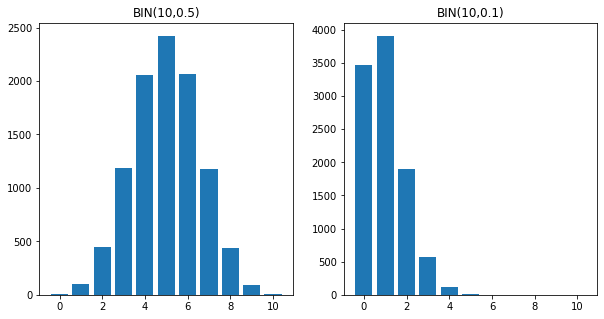

In [42]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
axes[0].bar(x=np.arange(11),
            height=prob_df["binom_10_2"].value_counts().sort_index())
axes[0].set_title("BIN(10,0.5)")
axes[1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["binom_10_10"].value_counts().sort_index()).fillna(0))
axes[1].set_title("BIN(10,0.1)")

## Poisson eloszlások

In [43]:
prob_df["poi_1"]=np.random.poisson(1,10000)
prob_df["poi_5"]=np.random.poisson(5,10000)

In [8]:
print(prob_df["poi_1"].value_counts().sort_index())
print(prob_df["poi_5"].value_counts().sort_index())

0    3774
1    3653
2    1794
3     603
4     146
5      27
6       3
Name: poi_1, dtype: int64
0       71
1      320
2      815
3     1433
4     1765
5     1788
6     1477
7     1050
8      625
9      356
10     172
11      70
12      32
13      12
14      10
15       4
Name: poi_5, dtype: int64


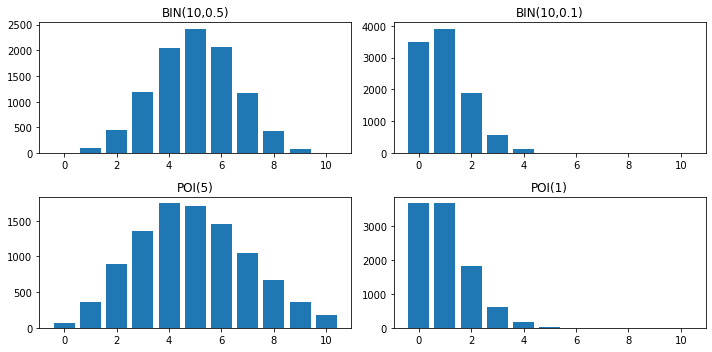

In [44]:
fig,axes=plt.subplots(2,2,figsize=(10,5))
axes[0,0].bar(x=np.arange(11),height=prob_df["binom_10_2"].value_counts().sort_index())
axes[0,0].set_title("BIN(10,0.5)")
axes[0,1].bar(x=np.arange(11),
              height=pd.Series(index=np.arange(11),
                data=prob_df["binom_10_10"].value_counts().sort_index()).fillna(0))
axes[0,1].set_title("BIN(10,0.1)")

axes[1,0].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_5"].value_counts().sort_index()).fillna(0))
axes[1,0].set_title("POI(5)")

axes[1,1].bar(x=np.arange(11),height=pd.Series(index=np.arange(11),data=prob_df["poi_1"].value_counts().sort_index()).fillna(0))
axes[1,1].set_title("POI(1)")
plt.tight_layout()
#nem  teljesen ugyanaz!

## Teszteljük a kiértékelő függvény funkcionalitását

In [69]:
suruseg_ertekelo(prob_df['binom_10_10'], prob_df['poi_1'])

0.028200000000000003

## Hasonlítsuk össze a különböző paraméterű eloszlásokat

Generáljunk le sok eloszlást, és nézzük meg, adott n-hez a kisebb vagy nagyobb várható értékű Binomiális és Poisson eloszlások közötti különbség konvergál gyorsabban? 

lambda = n*p mindig

n értékét iteráljuk 2-1000 között

így kicsi (pl.: 0.1) p esetén 0.2-100 között iteráljuk a lambdát, míg nagy (0.9) p esetén 1.8-900 között

a vizsgált p-k: 0.1, 0.25, 0.5, 0.75, 0.9

In [71]:
n_values = np.linspace(2,1000,999)

Text(0, 0.5, 'Legnagyobb eltérés')

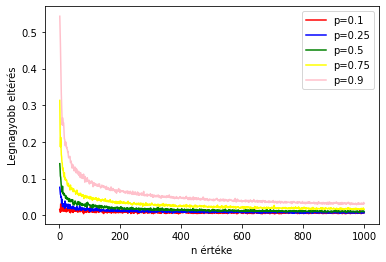

In [72]:
plt.plot(n_values, np.array([general_ertekel(x, 0.1) for x in n_values]), color = 'red', label = 'p=0.1')
plt.plot(n_values, np.array([general_ertekel(x, 0.25) for x in n_values]), color = 'blue', label = 'p=0.25')
plt.plot(n_values, np.array([general_ertekel(x, 0.5) for x in n_values]), color = 'green', label = 'p=0.5')
plt.plot(n_values, np.array([general_ertekel(x, 0.75) for x in n_values]), color = 'yellow', label = 'p=0.75')
plt.plot(n_values, np.array([general_ertekel(x, 0.9) for x in n_values]), color = 'pink', label = 'p=0.9')
plt.legend()
plt.xlabel('n értéke')
plt.ylabel('Legnagyobb eltérés')

Kezd kirajzolódni valami

**Vágjuk le a hosszú farkat, hogy jobban lássuk!**

Most n-t 2-200 között fogjuk iterálni

In [73]:
n_values2 = np.linspace(2,200,199)

Text(0, 0.5, 'Legnagyobb eltérés')

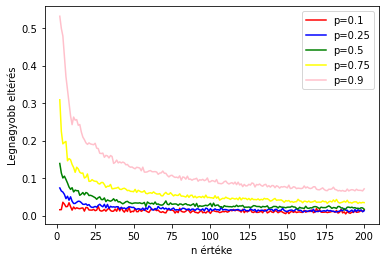

In [74]:
plt.plot(n_values2, np.array([general_ertekel(x, 0.1) for x in n_values2]), color = 'red', label = 'p=0.1')
plt.plot(n_values2, np.array([general_ertekel(x, 0.25) for x in n_values2]), color = 'blue', label = 'p=0.25')
plt.plot(n_values2, np.array([general_ertekel(x, 0.5) for x in n_values2]), color = 'green', label = 'p=0.5')
plt.plot(n_values2, np.array([general_ertekel(x, 0.75) for x in n_values2]), color = 'yellow', label = 'p=0.75')
plt.plot(n_values2, np.array([general_ertekel(x, 0.9) for x in n_values2]), color = 'pink', label = 'p=0.9')
plt.legend()
plt.xlabel('n értéke')
plt.ylabel('Legnagyobb eltérés')

Azt láthatjuk az ábrán, egy adott **n** esetében minél nagyobbak a szórások (p=0.5-höz egy adott n esetén nagyobb lambda tartozik, mint p=0.1-hez), annál nagyobb lesz a differencia a két eloszlás sűrűségfüggvénye között.

Ahogy növeljük az n-t, nagyobb szórások esetén meredekebben csökken a két sűrűségfüggvény különbsége.

**Próbáljuk ki az egyik órai tanácsot, és logaritmizáljuk az x tengelyt, hogy eltűnjön a "könyék"!**

Text(0, 0.5, 'Legnagyobb eltérés')

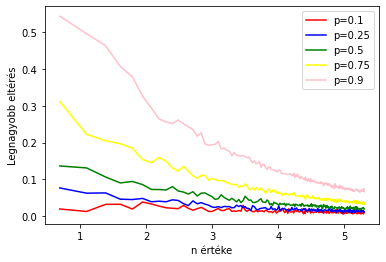

In [79]:
plt.plot(np.log(n_values2), np.array([general_ertekel(x, 0.1 ) for x in n_values2]), color = 'red', label = 'p=0.1')
plt.plot(np.log(n_values2), np.array([general_ertekel(x, 0.25) for x in n_values2]), color = 'blue', label = 'p=0.25')
plt.plot(np.log(n_values2), np.array([general_ertekel(x, 0.5 ) for x in n_values2]), color = 'green', label = 'p=0.5')
plt.plot(np.log(n_values2), np.array([general_ertekel(x, 0.75) for x in n_values2]), color = 'yellow', label = 'p=0.75')
plt.plot(np.log(n_values2), np.array([general_ertekel(x, 0.9 ) for x in n_values2]), color = 'pink', label = 'p=0.9')
plt.legend()
plt.xlabel('n értéke')
plt.ylabel('Legnagyobb eltérés')

# HF2. Normalizációs konstans
Számoljátok ki pythonnal a normalizációs konstanst erre a 4 eloszlásra! Ez pont ugyanaz, mintha azt kérdezném hogy mekkora a hisztogramokon a kék terület!

Miért ilyen nagy az $\alpha=1.5$ paraméterrel rendelkező eloszlás várható értéke és szórása?

## Eloszlások

In [83]:
prob_df["power_2"]=powerlaw.Power_Law(xmin=2, parameters=[2],
                                      discrete=True).generate_random(10000)
prob_df["power_2_5"]=powerlaw.Power_Law(xmin=2, parameters=[2.5],
                                      discrete=True).generate_random(10000)
prob_df["power_3"]=powerlaw.Power_Law(xmin=2, parameters=[3],
                                      discrete=True).generate_random(10000)
prob_df["power_1_5"]=powerlaw.Power_Law(xmin=2, parameters=[1.5],
                                        discrete=True).generate_random(10000)

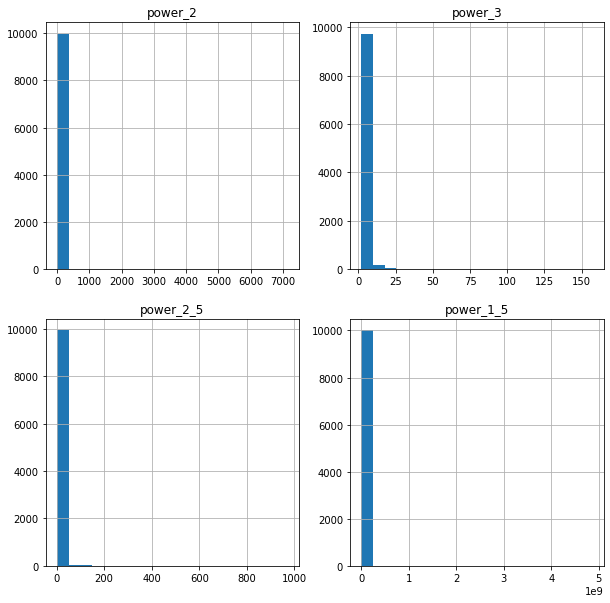

In [84]:
fig,axes=plt.subplots(2,2,figsize=(10,10))
row=0
col=0
for pl  in ["power_2","power_2_5","power_3","power_1_5"]:
    prob_df[pl].hist(bins=20,ax=axes[row,col])
    #axes[row,col].bar(x=prob_df[pl].unique(),height=prob_df[pl].value_counts().sort_index())
    axes[row,col].set_title(pl)
    if row==1:
        col+=1
        row=0
    else:
        row+=1

## Hisztogram alatti terület

https://stackoverflow.com/questions/26399291/how-to-get-the-area-under-a-histogram-in-python

In [ ]:
#x = numpy.random.randn(1000)
#
#values, bins, _ = plt.hist(x, normed=True)
#area = sum(numpy.diff(bins)*values)

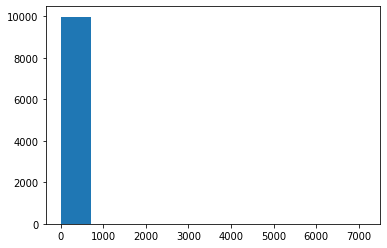

In [132]:
values, bins, _ = plt.hist(prob_df['power_2'])

In [133]:
sum(np.diff(bins)*values)

7147999.999999999

power_2
MEAN : 15.20
MEDIAN: 4.00
STDEV : 124.52
NORM_CONST : 7148000.00
 
power_2_5
MEAN : 5.00
MEDIAN: 3.00
STDEV : 17.32
NORM_CONST : 970000.00
 
power_3
MEAN : 3.46
MEDIAN: 3.00
STDEV : 4.09
NORM_CONST : 155000.00
 
power_1_5
MEAN : 611833.50
MEDIAN: 6.00
STDEV : 49796609.16
NORM_CONST : 4856945064000.00
 


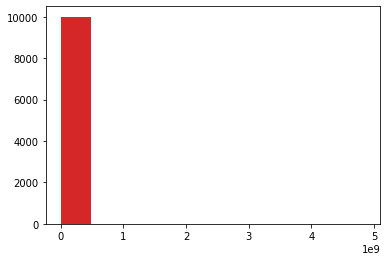

In [134]:
for pl in ["power_2","power_2_5","power_3","power_1_5"]:
    print(pl)
    print("MEAN : {0:.2f}".format(prob_df[pl].mean()))
    print("MEDIAN: {0:.2f}".format(prob_df[pl].median()))
    print("STDEV : {0:.2f}".format(prob_df[pl].std()))
    print("NORM_CONST : {0:.2f}".format(norm_konst(prob_df[pl])))
    print(" ")

## Miért ilyen nagy a szórása az alfa = 1,5 esetnek?

Generáljunk power law eloszlásokat alfa = 1.1 és 5 között, és nézzük meg a szórásukat!

In [21]:
alfa_values = np.linspace(1.1,5,40)
alfa_values

array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3,
       2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6,
       3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9,
       5. ])

Text(0, 0.5, 'std of power law')

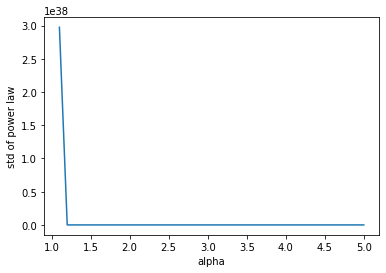

In [36]:
plt.plot(alfa_values, np.array([powerlaw.Power_Law(xmin=2, parameters=[x], discrete=True).generate_random(10000).std() for x in alfa_values]))
plt.xlabel('alpha')
plt.ylabel('std of power law')

A jobb olvashatóság érdkében logaritmizáljuk az y tengelyt

Text(0, 0.5, 'log of std of power law')

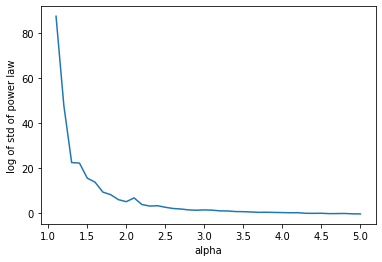

In [38]:
plt.plot(alfa_values, np.log(np.array([powerlaw.Power_Law(xmin=2, parameters=[x], discrete=True).generate_random(10000).std() for x in alfa_values])))
plt.xlabel('alpha')
plt.ylabel('log of std of power law')

Habár nem bizonyítás, de a fenti ábra bemutatja, hogy az 1-hez közelítő alfák esetében a power law eloszlás szórása meredeken nő, így nem meglepő, hogy az 1.5, 2, 2.5, 3 alfákat az előző részfeladatban vizsgálva az 1.5-ös alfához tartozott a legnagyobb szórás.

# HF3. CHT
Csináljunk arra egy metrikát, hogy mennyire normális eloszlású egy adott dolog

pl.: "mindig 100 bin és a normális eloszláshoz nézed, hogy mi a legnagyobb eltérés két bin között"
ha nő az N, egyre normálisabb

Vegyünk egy binomiális eloszlást és egy standard normál eloszlást

In [149]:
prob_df["binom_500_5"]=np.random.binomial(500,0.2,10000)
prob_df["std_norm"]=np.random.normal(0,1,10000)

<BarContainer object of 501 artists>

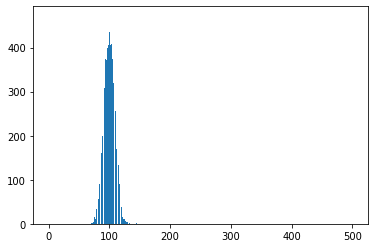

In [135]:
plt.bar(x=np.arange(501),height=pd.Series(index=np.arange(501),data=prob_df["binom_500_5"].value_counts().sort_index()).fillna(0))

In [145]:
plot_df = ((prob_df['binom_500_5'] - prob_df['binom_500_5'].mean()) / prob_df['binom_500_5'].std()).value_counts().sort_index()

In [194]:
bins = np.linspace(plot_df.index.min(), plot_df.index.max(), 101)

In [200]:
pd.cut(plot_df, bins).value_counts().sort_index()

(-4.263, -4.17]     0
(-4.17, -4.077]     0
(-4.077, -3.984]    0
(-3.984, -3.892]    0
(-3.892, -3.799]    0
                   ..
(4.571, 4.664]      0
(4.664, 4.757]      0
(4.757, 4.85]       0
(4.85, 4.943]       0
(4.943, 5.036]      1
Name: binom_500_5, Length: 100, dtype: int64

In [180]:
prob_df['std_norm'].value_counts().sort_index()

-3.751130    1
-3.732551    1
-3.719928    1
-3.384807    1
-3.272598    1
            ..
 3.344008    1
 3.407951    1
 3.512622    1
 3.586194    1
 3.984194    1
Name: std_norm, Length: 10000, dtype: int64

Ezzel addig sikerült eljutnom, hogy megvan a binomiális eloszlás standardizálva, és egy ugyanilyen elemszámú standard normális eloszlás realizáció.

Ahol elakadtam, mint következő lépés: a 100 binbe cut-olása az értékekenek
    
Ezutána következő gondolatmenettel folytattam volna:
    * a két 100 binbe cutolt eloszlás összehasonlítása, a maximális abszolút különbség kiszámolása
    * ezt függvénybe kiírni
    * a binomiális eloszlásból veszek 10-9000 nagyságú véletlen mintákat, és mindegyikre kiszámolom a függvénnyel a std normális eloszlástól való különbséget
    * ezt egy vonaldiagramon plotolom, szükség szerint az ábrázoláshoz logaritmizálom a tengelyeket